In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [2]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd

from genetic_program import FitnessFunction
from gp_artemis import ExperimentManager
from IPython.core.display import HTML, Javascript
from chart_plotter import DogeDNACanvas

CONDENSED_COLS = ['individual_str', 'transaction_currency', 'counter_currency', 'profit_percent', 'benchmark_profit_percent']

%matplotlib inline
pd.set_option('display.max_columns', 500)

# you can define custom fitness functions here and add them to the JSON below
class WowFitnessFunction(FitnessFunction):
    _name = "ff_sowow"

    def compute(self, individual, evaluation, genetic_program):
        return evaluation.profit_percent * evaluation.num_sells,

    
experiment_json = {
    "training_data": [
        {
        "transaction_currency": "BTC",
        "counter_currency": "USDT",
        "start_time": "2018/04/01 00:00:00 UTC",
        "end_time": "2018/06/01 00:00:00 UTC",
        "resample_period": 60,
        "source": 0
        },
        {
        "transaction_currency": "DOGE",
        "counter_currency": "BTC",
        "start_time": "2018/04/01 00:00:00 UTC",
        "end_time": "2018/06/01 00:00:00 UTC",
        "resample_period": 60,
        "source": 0
        },
        {
        "transaction_currency": "OMG",
        "counter_currency": "BTC",
        "start_time": "2018/06/01 00:00:00 UTC",
        "end_time": "2018/08/01 00:00:00 UTC",
        "resample_period": 60,
        "source": 0
        }
    ],

    "validation_data": [{
        "transaction_currency": "ETH",
        "counter_currency": "BTC",
        "start_time": "2018/06/01 00:00:00 UTC",
        "end_time": "2018/08/01 00:00:00 UTC",
        "resample_period": 60,
        "source": 0
    }],

    "fitness_functions": ["ff_benchmarkdiff", "ff_v1", "ff_benchmarkdiff_trades", "ff_benchlenctrl", "ff_benchlenctrl_v2", "ff_benchlenctrl_v3"],
    "grammar_version": "gv3",
    "num_generations": 10,

    "mating_probabilities": [
        0.9
    ],

    "mutation_probabilities": [
        0.5
    ],

    "population_sizes": [
        500 # range(200, 1000, 200)
    ]
}

e = ExperimentManager(experiment_json, read_from_file=False)
e.run_experiments(display_results=False)


INFO:root:>>> Variant run_evolution.data_BTC-USDT-1522540800.0-1527811200.0-DOGE-BTC-1522540800.0-1527811200.0-OMG-BTC-1527811200.0-1533081600.0;grammar_gv3;fitness_ff_benchmarkdiff;x_0.9;m_0.5;n_500;gen_10 already has completed records, skipping...
INFO:root:>>> Variant run_evolution.data_BTC-USDT-1522540800.0-1527811200.0-DOGE-BTC-1522540800.0-1527811200.0-OMG-BTC-1527811200.0-1533081600.0;grammar_gv3;fitness_ff_v1;x_0.9;m_0.5;n_500;gen_10 already has completed records, skipping...
INFO:root:>>> Variant run_evolution.data_BTC-USDT-1522540800.0-1527811200.0-DOGE-BTC-1522540800.0-1527811200.0-OMG-BTC-1527811200.0-1533081600.0;grammar_gv3;fitness_ff_benchmarkdiff_trades;x_0.9;m_0.5;n_500;gen_10 already has completed records, skipping...
INFO:root:>>> Variant run_evolution.data_BTC-USDT-1522540800.0-1527811200.0-DOGE-BTC-1522540800.0-1527811200.0-OMG-BTC-1527811200.0-1533081600.0;grammar_gv3;fitness_ff_benchlenctrl;x_0.9;m_0.5;n_500;gen_10 already has completed records, skipping...
INFO:

### Looking at performance per training dataset and across all experiment variants
For each training dataset in the training collection, we get a performance dataframe sorted by profit. The dataframes and best individuals in them are shown below.

Experiment id: run_evolution.data_BTC-USDT-1522540800.0-1527811200.0-DOGE-BTC-1522540800.0-1527811200.0-OMG-BTC-1527811200.0-1533081600.0;grammar_gv3;fitness_ff_benchmarkdiff;x_0.9;m_0.5;n_500;gen_10



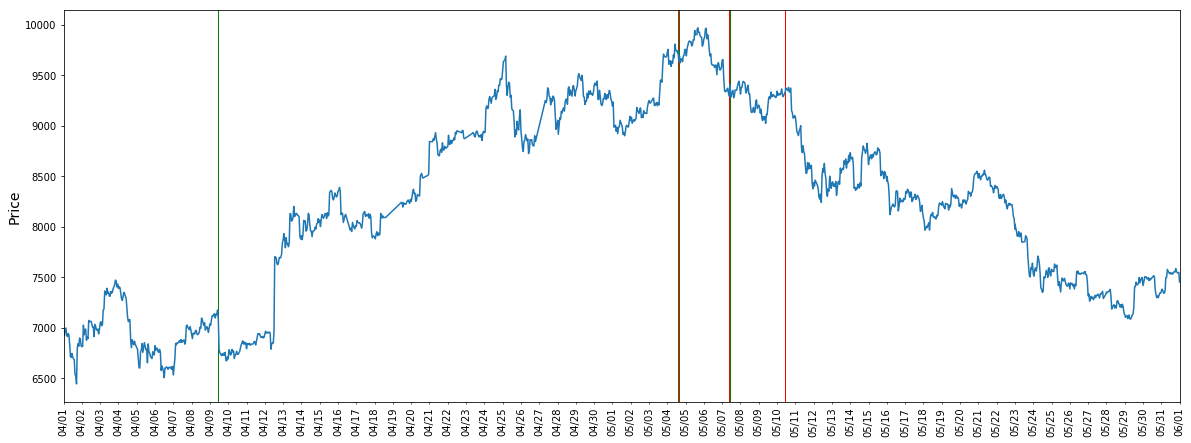

String representation:
if_then_else(gt(ema200(ARG0), ema50(ARG0)), if_then_else(lt(sma50(identity_list(ARG0)), sma50(identity_list(ARG0))), if_then_else(gt(price(ARG0), sma50(ARG0)), if_then_else(gt(5.203699550225373, 79.33907314518792), if_then_else(False, buy, ignore), if_then_else(True, sell, buy)), if_then_else(lt(91.81906564659312, 87.68591911278607), if_then_else(False, buy, sell), if_then_else(True, ignore, ignore))), if_then_else(identity_bool(identity_bool(True)), if_then_else(lt(25.188513993475595, 5.204650283648808), if_then_else(False, ignore, buy), if_then_else(False, sell, ignore)), if_then_else(identity_bool(False), if_then_else(False, ignore, buy), if_then_else(True, sell, sell)))), if_then_else(lt(ema200(identity_list(ARG0)), sma50(identity_list(ARG0))), if_then_else(lt(91.65447368067163, ema50(ARG0)), if_then_else(lt(72.65096031503073, 15.492839530224595), if_then_else(True, buy, sell), if_then_else(True, buy, buy)), if_then_else(identity_bool(False), if_then_else(Tru

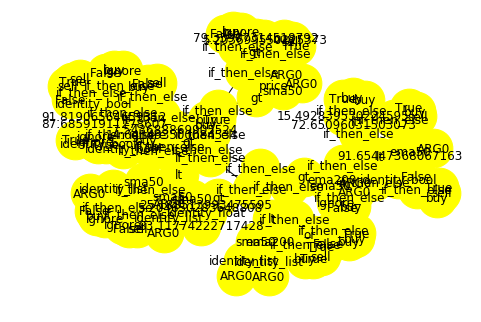

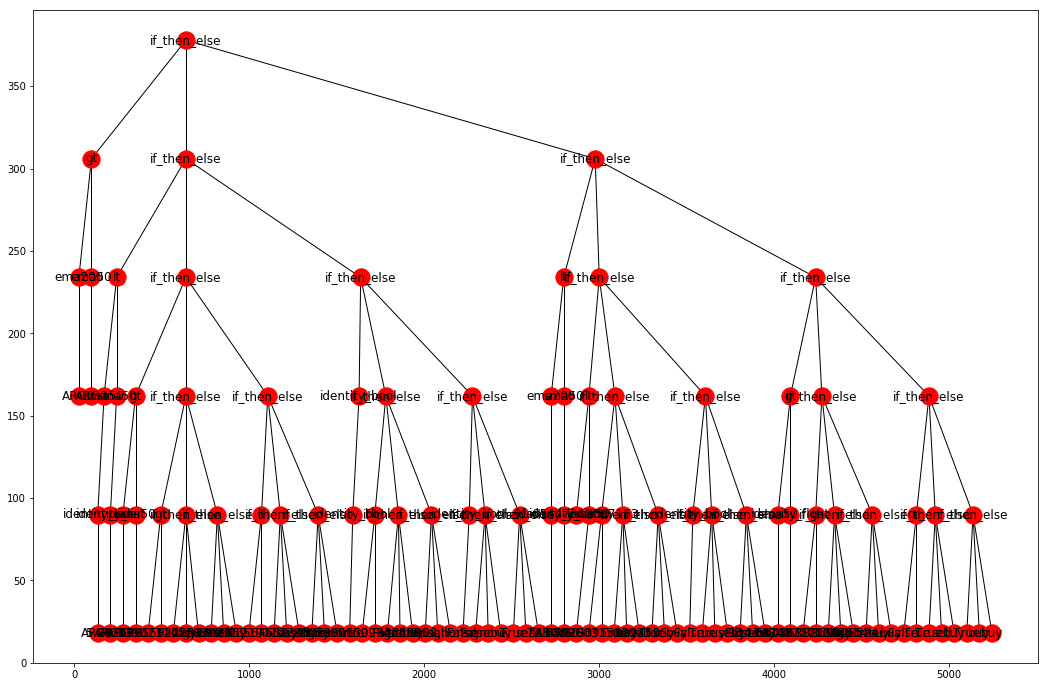

Backtesting report:
--

* Order execution log *

Start balance: cash = 1000 USDT, crypto = 0 
Start time: 2018-04-01 00:00:00
--
--
2018-04-09 11:00:00  	 OrderType.BUY    	 cash_balance ->      -1000.00 USDT 	 currency_balance ->      0.140890 BTC 	 (1 BTC = 7080.00000000 USDT ), slippage = 0.00
   signal: genetic_up strength=3 trend=1 horizon=None timestamp=2018-04-09 11:00:00 rsi_value=None
2018-05-04 14:02:00  	 OrderType.SELL   	 cash_balance ->       1369.14 USDT 	 currency_balance ->     -0.140890 BTC 	 (1 BTC = 9742.19299917 USDT ), slippage = 0.00
   signal: genetic_down strength=3 trend=-1 horizon=None timestamp=2018-05-04 14:02:00 rsi_value=None
2018-05-04 15:00:00  	 OrderType.BUY    	 cash_balance ->      -1369.14 USDT 	 currency_balance ->      0.141652 BTC 	 (1 BTC = 9641.36998356 USDT ), slippage = 0.00
   signal: genetic_up strength=3 trend=1 horizon=None timestamp=2018-05-04 15:00:00 rsi_value=None
2018-05-07 09:00:00  	 OrderType.SELL   	 cash_balance ->       1313.3

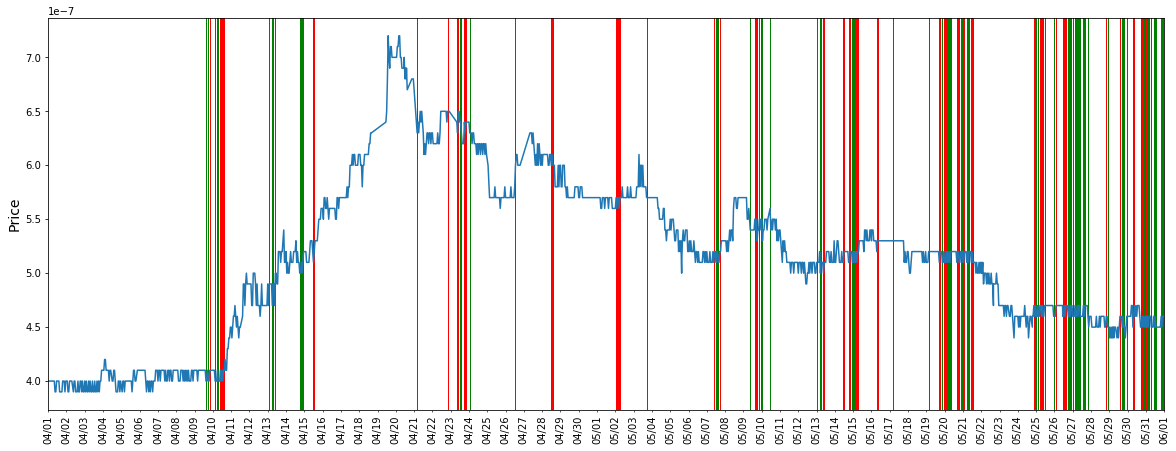

String representation:
if_then_else(gt(sma50(identity_list(identity_list(ARG0))), identity_float(price(identity_list(ARG0)))), if_then_else(and_(lt(sma50(ARG0), ema200(ARG0)), or_(identity_bool(True), lt(8.846578667838305, 75.49856243054188))), if_then_else(or_(identity_bool(False), and_(False, False)), if_then_else(and_(False, False), if_then_else(True, buy, buy), if_then_else(False, sell, sell)), if_then_else(or_(True, True), buy, if_then_else(True, ignore, buy))), if_then_else(identity_bool(gt(73.70671685737867, 95.68750775000208)), if_then_else(and_(True, True), if_then_else(True, sell, sell), if_then_else(False, buy, ignore)), if_then_else(gt(98.0998668091151, 73.70671685737867), if_then_else(False, buy, buy), if_then_else(True, ignore, sell)))), if_then_else(or_(lt(sma50(ARG0), identity_float(25.436189000138796)), identity_bool(or_(False, False))), if_then_else(and_(identity_bool(True), and_(True, True)), if_then_else(identity_bool(True), if_then_else(False, ignore, sell), if_the

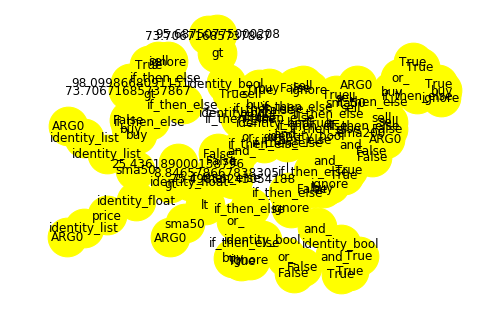

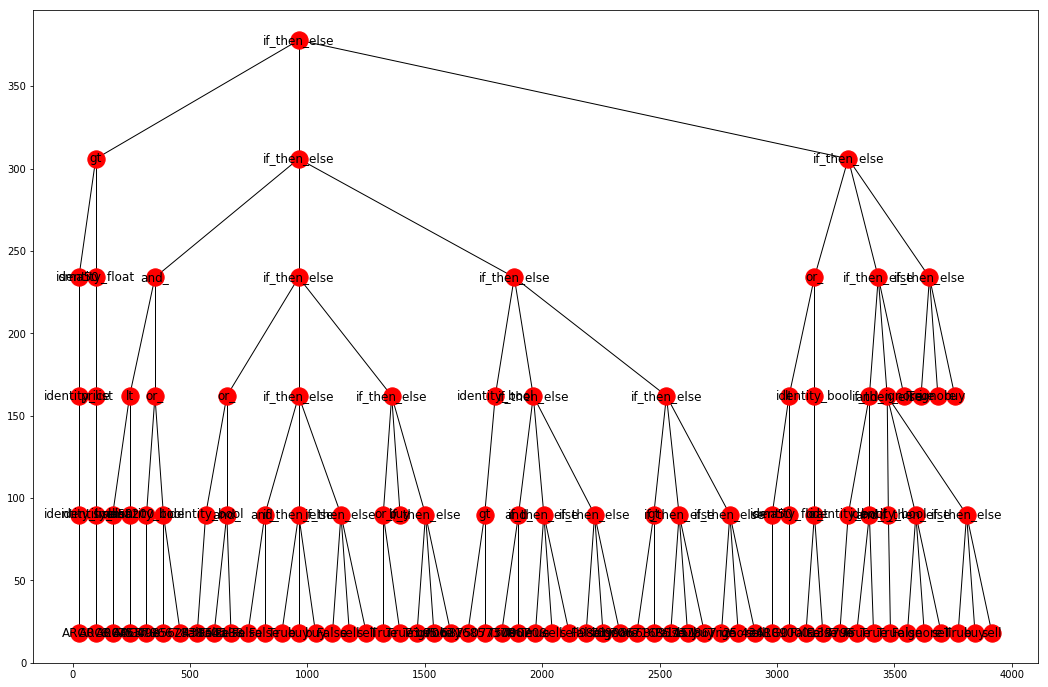

Backtesting report:
--

* Order execution log *

Start balance: cash = 1000 BTC, crypto = 0 
Start time: 2018-04-01 00:00:00
--
--
2018-04-09 15:00:00  	 OrderType.BUY    	 cash_balance ->      -1000.00 BTC 	 currency_balance -> 2493750000.000000 DOGE 	 (1 DOGE = 0.00000040 BTC ), slippage = 0.00
   signal: genetic_up strength=3 trend=1 horizon=None timestamp=2018-04-09 15:00:00 rsi_value=None
2018-04-09 17:00:00  	 OrderType.SELL   	 cash_balance ->       1019.88 BTC 	 currency_balance -> -2493750000.000000 DOGE 	 (1 DOGE = 0.00000041 BTC ), slippage = 0.00
   signal: genetic_down strength=3 trend=-1 horizon=None timestamp=2018-04-09 17:00:00 rsi_value=None
2018-04-09 18:00:00  	 OrderType.BUY    	 cash_balance ->      -1019.88 BTC 	 currency_balance -> 2543329256.835938 DOGE 	 (1 DOGE = 0.00000040 BTC ), slippage = 0.00
   signal: genetic_up strength=3 trend=1 horizon=None timestamp=2018-04-09 18:00:00 rsi_value=None
2018-04-09 20:00:00  	 OrderType.SELL   	 cash_balance ->       104

Experiment id: run_evolution.data_BTC-USDT-1522540800.0-1527811200.0-DOGE-BTC-1522540800.0-1527811200.0-OMG-BTC-1527811200.0-1533081600.0;grammar_gv3;fitness_ff_benchlenctrl_v3;x_0.9;m_0.5;n_500;gen_10



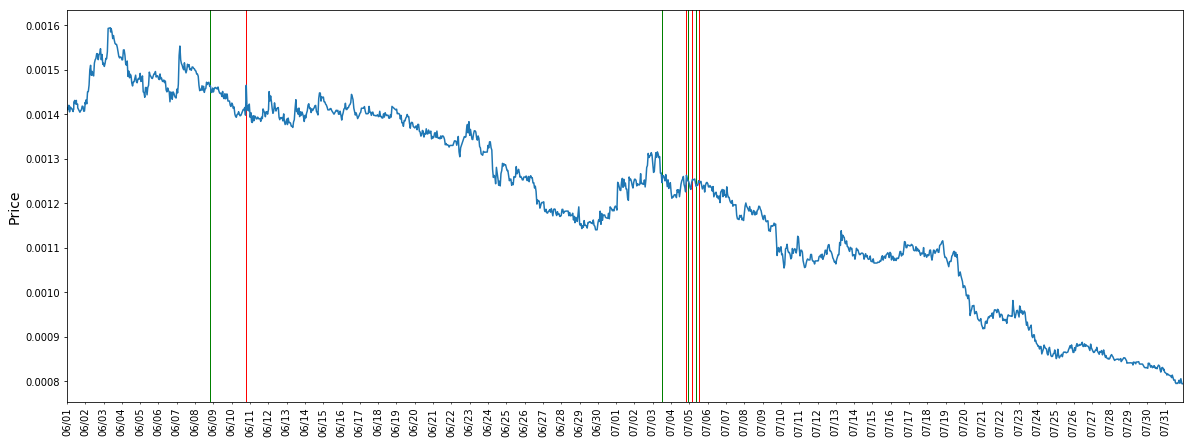

String representation:
if_then_else(gt(sma50(identity_list(identity_list(ARG0))), identity_float(price(identity_list(ARG0)))), if_then_else(and_(lt(sma50(ARG0), ema200(ARG0)), or_(identity_bool(True), lt(8.846578667838305, 75.49856243054188))), if_then_else(identity_bool(True), ignore, sell), if_then_else(identity_bool(gt(85.8312705551318, 95.68750775000208)), if_then_else(and_(True, True), if_then_else(True, sell, sell), if_then_else(False, buy, ignore)), if_then_else(gt(71.62107767787313, 27.498353841793932), if_then_else(False, ignore, buy), if_then_else(True, ignore, sell)))), if_then_else(or_(lt(sma50(ARG0), identity_float(25.436189000138796)), identity_bool(or_(False, False))), if_then_else(and_(identity_bool(True), and_(True, True)), if_then_else(identity_bool(True), if_then_else(False, ignore, sell), if_then_else(True, buy, sell)), if_then_else(lt(83.11619658103237, 4.796419712663785), if_then_else(True, buy, sell), if_then_else(False, ignore, ignore))), if_then_else(True, igno

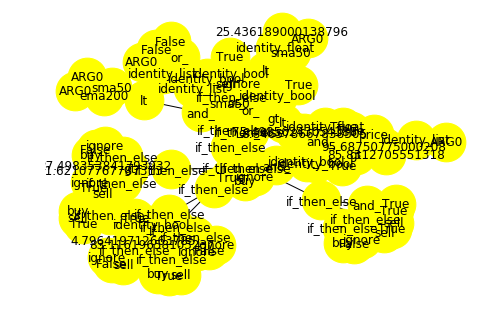

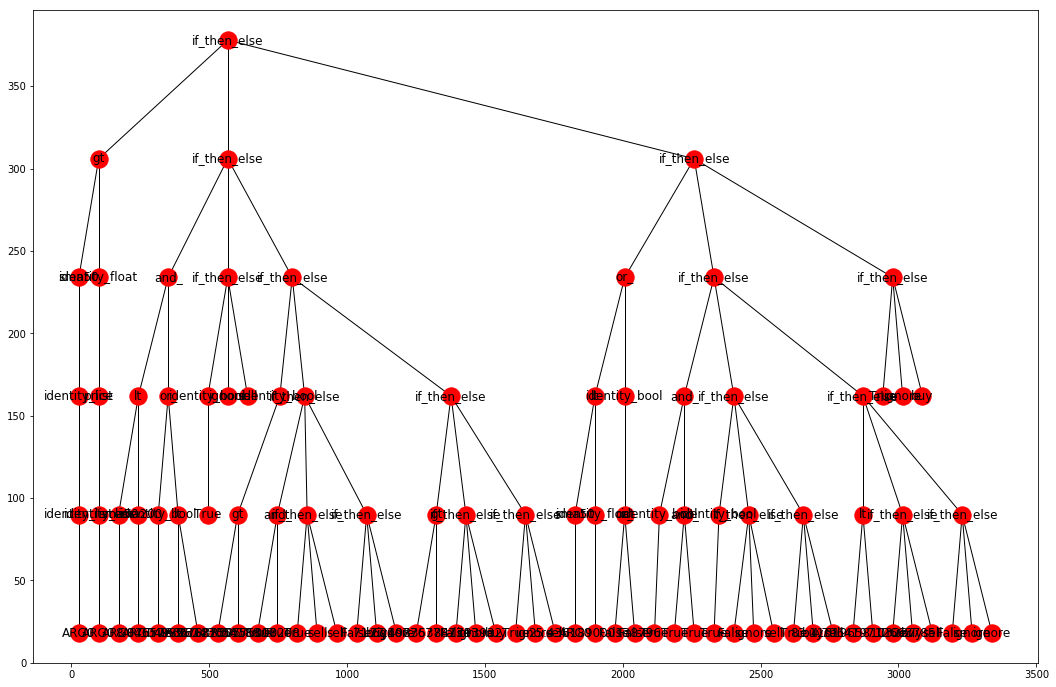

Backtesting report:
--

* Order execution log *

Start balance: cash = 1000 BTC, crypto = 0 
Start time: 2018-06-01 00:00:00
--
--
2018-06-08 20:07:00  	 OrderType.BUY    	 cash_balance ->      -1000.00 BTC 	 currency_balance -> 681701.691440 OMG 	 (1 OMG = 0.00146325 BTC ), slippage = 0.00
   signal: genetic_up strength=3 trend=1 horizon=None timestamp=2018-06-08 20:07:00 rsi_value=None
2018-06-10 19:04:00  	 OrderType.SELL   	 cash_balance ->        996.28 BTC 	 currency_balance -> -681701.691440 OMG 	 (1 OMG = 0.00146513 BTC ), slippage = 0.00
   signal: genetic_down strength=3 trend=-1 horizon=None timestamp=2018-06-10 19:04:00 rsi_value=None
2018-07-03 12:03:00  	 OrderType.BUY    	 cash_balance ->       -996.28 BTC 	 currency_balance -> 797555.421989 OMG 	 (1 OMG = 0.00124605 BTC ), slippage = 0.00
   signal: genetic_up strength=3 trend=1 horizon=None timestamp=2018-07-03 12:03:00 rsi_value=None
2018-07-04 20:06:00  	 OrderType.SELL   	 cash_balance ->       1004.54 BTC 	 currenc

In [3]:
performance_dfs = e.get_joined_performance_dfs_over_all_variants()

We can explore each of the performance dataframes in more detail.

In [4]:
#pd.set_option('display.max_colwidth', -1)
performance_dfs[0][CONDENSED_COLS]

,individual_str,transaction_currency,counter_currency,profit_percent,benchmark_profit_percent
1,"if_then_else(gt(ema200(ARG0), ema50(ARG0)), if...",BTC,USDT,30.152724,4.700516
6,"if_then_else(lt(ema200(identity_list(ARG0)), i...",BTC,USDT,17.451634,4.700516
1,"if_then_else(lt(ema200(identity_list(ARG0)), i...",BTC,USDT,17.451634,4.700516
2,"if_then_else(lt(ema200(identity_list(ARG0)), i...",BTC,USDT,17.451634,4.700516
3,if_then_else(lt(ema200(identity_list(identity_...,BTC,USDT,17.451634,4.700516
4,"if_then_else(lt(ema200(identity_list(ARG0)), i...",BTC,USDT,17.451634,4.700516
5,"if_then_else(lt(ema200(identity_list(ARG0)), i...",BTC,USDT,17.451634,4.700516
0,"if_then_else(lt(ema200(identity_list(ARG0)), i...",BTC,USDT,17.451634,4.700516
0,if_then_else(gt(ema200(identity_list(identity_...,BTC,USDT,16.188254,4.700516
2,"if_then_else(identity_bool(gt(ema200(ARG0), em...",BTC,USDT,11.149638,4.700516


Experiment id: run_evolution.data_BTC-USDT-1522540800.0-1527811200.0-DOGE-BTC-1522540800.0-1527811200.0-OMG-BTC-1527811200.0-1533081600.0;grammar_gv3;fitness_ff_benchmarkdiff;x_0.9;m_0.5;n_500;gen_10



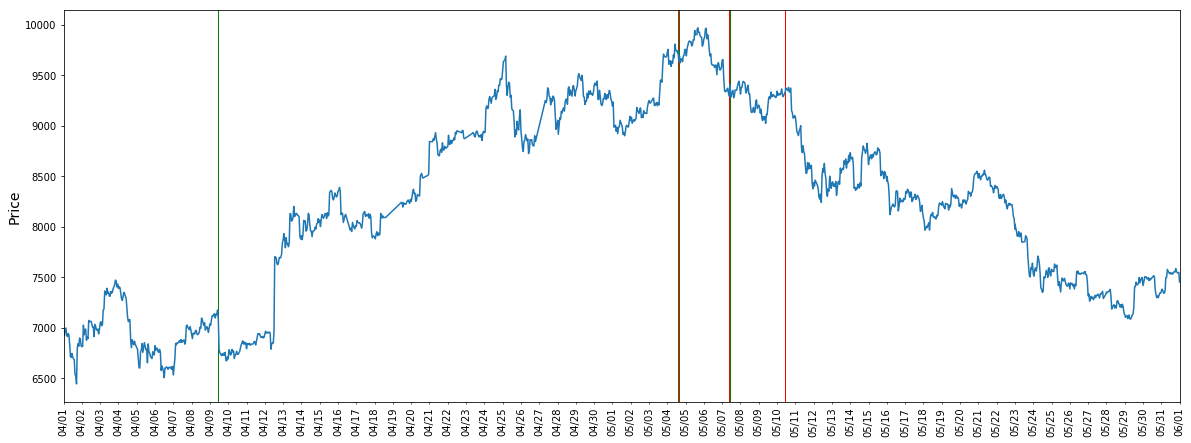

String representation:
if_then_else(gt(ema200(ARG0), ema50(ARG0)), if_then_else(lt(sma50(identity_list(ARG0)), sma50(identity_list(ARG0))), if_then_else(gt(price(ARG0), sma50(ARG0)), if_then_else(gt(5.203699550225373, 79.33907314518792), if_then_else(False, buy, ignore), if_then_else(True, sell, buy)), if_then_else(lt(91.81906564659312, 87.68591911278607), if_then_else(False, buy, sell), if_then_else(True, ignore, ignore))), if_then_else(identity_bool(identity_bool(True)), if_then_else(lt(25.188513993475595, 5.204650283648808), if_then_else(False, ignore, buy), if_then_else(False, sell, ignore)), if_then_else(identity_bool(False), if_then_else(False, ignore, buy), if_then_else(True, sell, sell)))), if_then_else(lt(ema200(identity_list(ARG0)), sma50(identity_list(ARG0))), if_then_else(lt(91.65447368067163, ema50(ARG0)), if_then_else(lt(72.65096031503073, 15.492839530224595), if_then_else(True, buy, sell), if_then_else(True, buy, buy)), if_then_else(identity_bool(False), if_then_else(Tru

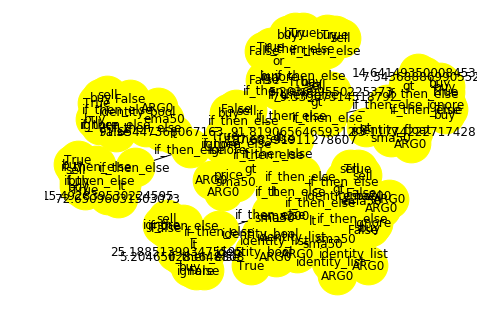

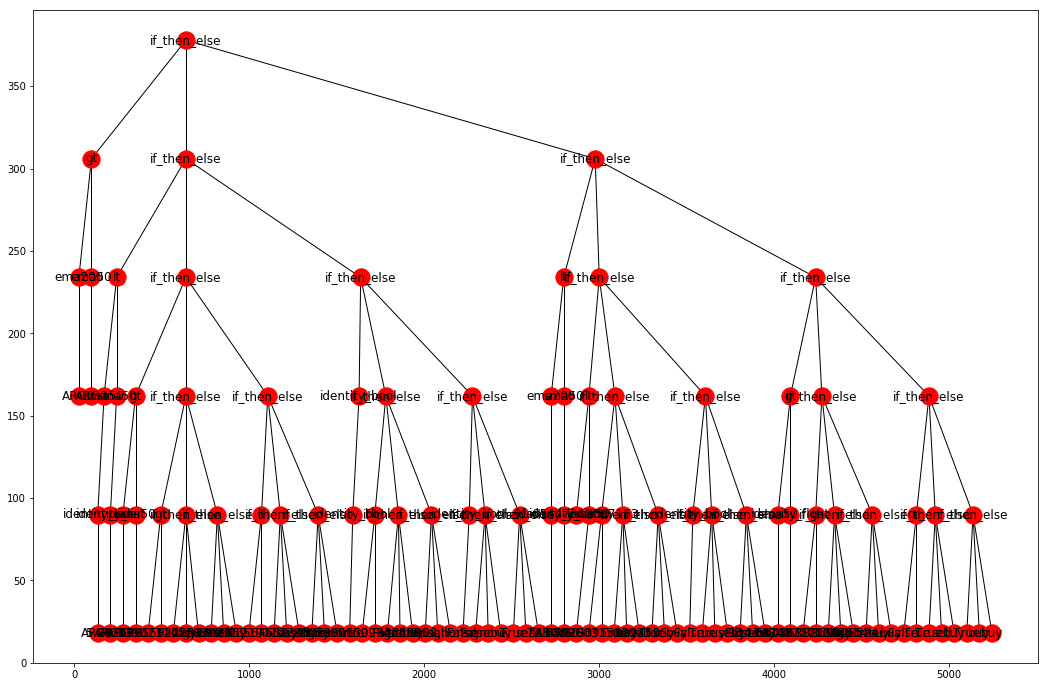

Backtesting report:
--

* Order execution log *

Start balance: cash = 1000 USDT, crypto = 0 
Start time: 2018-04-01 00:00:00
--
--
2018-04-09 11:00:00  	 OrderType.BUY    	 cash_balance ->      -1000.00 USDT 	 currency_balance ->      0.140890 BTC 	 (1 BTC = 7080.00000000 USDT ), slippage = 0.00
   signal: genetic_up strength=3 trend=1 horizon=None timestamp=2018-04-09 11:00:00 rsi_value=None
2018-05-04 14:02:00  	 OrderType.SELL   	 cash_balance ->       1369.14 USDT 	 currency_balance ->     -0.140890 BTC 	 (1 BTC = 9742.19299917 USDT ), slippage = 0.00
   signal: genetic_down strength=3 trend=-1 horizon=None timestamp=2018-05-04 14:02:00 rsi_value=None
2018-05-04 15:00:00  	 OrderType.BUY    	 cash_balance ->      -1369.14 USDT 	 currency_balance ->      0.141652 BTC 	 (1 BTC = 9641.36998356 USDT ), slippage = 0.00
   signal: genetic_up strength=3 trend=1 horizon=None timestamp=2018-05-04 15:00:00 rsi_value=None
2018-05-07 09:00:00  	 OrderType.SELL   	 cash_balance ->       1313.3

In [5]:
e.performance_df_row_info(performance_dfs[0].iloc[0])

### Best performing individuals across all variants and datasets
Each experiment variant will have a winner, the doge baby that had the best fitness value. We can get these winners by invoking the command below:

In [6]:
best_individuals_across_variants_and_datasets = e.get_best_performing_across_variants_and_datasets(e.training_data)

In [13]:
pd.set_option('display.max_colwidth', -1)
best_individuals_across_variants_and_datasets.drop(['individual','variant','evaluations'], axis=1)


,experiment_name,doge,fitness_function,fitness_value,mean_profit,std_profit,max_profit,min_profit,all_profits
5,run_evolution.data_BTC-USDT-1522540800.0-1527811200.0-DOGE-BTC-1522540800.0-1527811200.0-OMG-BTC-1527811200.0-1533081600.0;grammar_gv3;fitness_ff_benchlenctrl_v3;x_0.9;m_0.5;n_500;gen_10,"if_then_else(gt(sma50(ARG0), identity_float(price(identity_list(ARG0)))), buy, if_then_else(or_(lt(sma50(ARG0), identity_float(21.648617521520677)), identity_bool(or_(False, False))), if_then_else(and_(identity_bool(True), and_(True, True)), if_then_else(identity_bool(True), if_then_else(False, ignore, sell), if_then_else(True, buy, sell)), buy), if_then_else(gt(rsi(ARG0), price(ARG0)), if_then_else(gt(83.27146606523092, 22.58023545174284), if_then_else(True, ignore, ignore), if_then_else(False, sell, sell)), if_then_else(gt(81.49150743319458, 1.8997632849846446), if_then_else(False, sell, ignore), if_then_else(True, sell, sell)))))",ff_benchlenctrl_v3,5.059007,41.812459,78.209810,149.624043,-33.486281,"9.299615517917893, 149.6240433916084, -33.48628092720124"
4,run_evolution.data_BTC-USDT-1522540800.0-1527811200.0-DOGE-BTC-1522540800.0-1527811200.0-OMG-BTC-1527811200.0-1533081600.0;grammar_gv3;fitness_ff_benchlenctrl_v2;x_0.9;m_0.5;n_500;gen_10,"if_then_else(lt(ema200(identity_list(ARG0)), identity_float(ema50(ARG0))), if_then_else(or_(or_(True, False), lt(12.65142571526445, 73.45033457372645)), if_then_else(and_(False, False), if_then_else(True, if_then_else(False, buy, buy), sell), buy), if_then_else(lt(0.3416707793972895, 16.744871255882792), if_then_else(True, buy, buy), if_then_else(True, if_then_else(True, buy, sell), ignore))), if_then_else(gt(price(ARG0), ema200(identity_list(ARG0))), if_then_else(and_(False, True), if_then_else(True, sell, sell), sell), if_then_else(lt(13.725951347103095, 75.17869352440655), if_then_else(True, ignore, if_then_else(True, sell, ignore)), if_then_else(True, sell, sell))))",ff_benchlenctrl_v2,10.913515,9.482577,15.018756,22.548419,-11.552323,"17.45163430763248, 22.548418538029612, -11.552322884119667"
0,run_evolution.data_BTC-USDT-1522540800.0-1527811200.0-DOGE-BTC-1522540800.0-1527811200.0-OMG-BTC-1527811200.0-1533081600.0;grammar_gv3;fitness_ff_benchmarkdiff;x_0.9;m_0.5;n_500;gen_10,"if_then_else(gt(ema200(identity_list(identity_list(ARG0))), sma200(identity_list(identity_list(ARG0)))), if_then_else(lt(sma50(identity_list(ARG0)), sma50(identity_list(ARG0))), if_then_else(gt(price(ARG0), sma50(ARG0)), if_then_else(gt(5.203699550225373, 79.33907314518792), if_then_else(False, buy, ignore), if_then_else(True, sell, buy)), if_then_else(lt(91.81906564659312, 71.17395197374101), if_then_else(False, ignore, sell), if_then_else(True, ignore, ignore))), if_then_else(identity_bool(identity_bool(True)), if_then_else(lt(25.188513993475595, 13.955523994837842), if_then_else(False, ignore, buy), if_then_else(False, sell, ignore)), if_then_else(identity_bool(False), if_then_else(True, ignore, buy), if_then_else(True, sell, sell)))), if_then_else(lt(ema200(identity_list(ARG0)), sma50(identity_list(ARG0))), if_then_else(lt(rsi(ARG0), ema50(ARG0)), ignore, if_then_else(identity_bool(False), if_then_else(True, buy, sell), if_then_else(False, ignore, buy))), if_then_else(gt(sma50(ARG0), identity_float(83.11774222717428)), if_then_else(gt(14.641493500084534, 7.543688869905524), if_then_else(True, buy, ignore), if_then_else(True, buy, buy)), if_then_else(or_(False, True), if_then_else(True, sell, buy), if_then_else(True, buy, buy)))))",ff_benchmarkdiff,-11.634848,4.997294,7.928262,16.188254,-1.196372,"16.188253850765, 0.0, -1.196372373141969"
2,run_evolution.data_BTC-USDT-1522540800.0-1527811200.0-DOGE-BTC-1522540800.0-1527811200.0-OMG-BTC-1527811200.0-1533081600.0;grammar_gv3;fitness_ff_benchmarkdiff_trades;x_0.9;m_0.5;n_500;gen_10,"if_then_else(False, sell, ignore)",ff_benchmarkdiff_trades,-0.000000,0.000000,0.000000,0.000000,0.000000,"0.0, 0.0, 0.0"
3,run_evolution.data_BTC-USDT-1522540800.0-1527811200.0-DOGE-

### How did this individual perform on training sets?

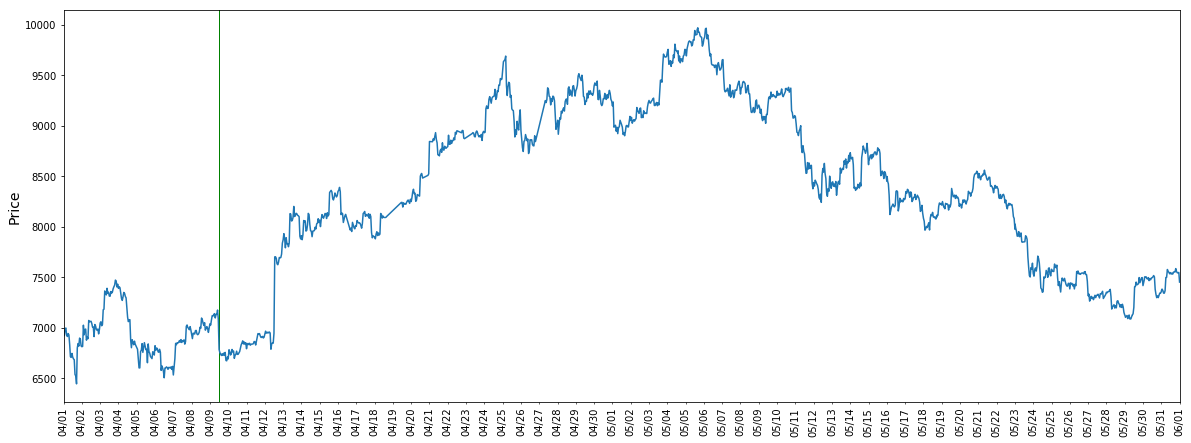

String representation:
if_then_else(gt(sma50(ARG0), identity_float(price(identity_list(ARG0)))), buy, if_then_else(or_(lt(sma50(ARG0), identity_float(21.648617521520677)), identity_bool(or_(False, False))), if_then_else(and_(identity_bool(True), and_(True, True)), if_then_else(identity_bool(True), if_then_else(False, ignore, sell), if_then_else(True, buy, sell)), buy), if_then_else(gt(rsi(ARG0), price(ARG0)), if_then_else(gt(83.27146606523092, 22.58023545174284), if_then_else(True, ignore, ignore), if_then_else(False, sell, sell)), if_then_else(gt(81.49150743319458, 1.8997632849846446), if_then_else(False, sell, ignore), if_then_else(True, sell, sell)))))



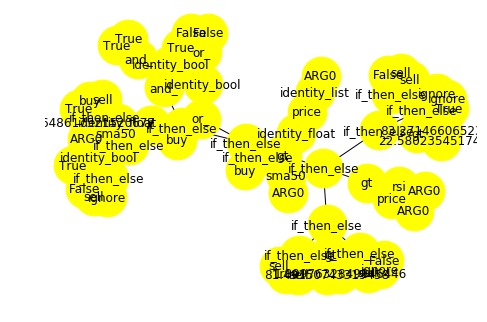

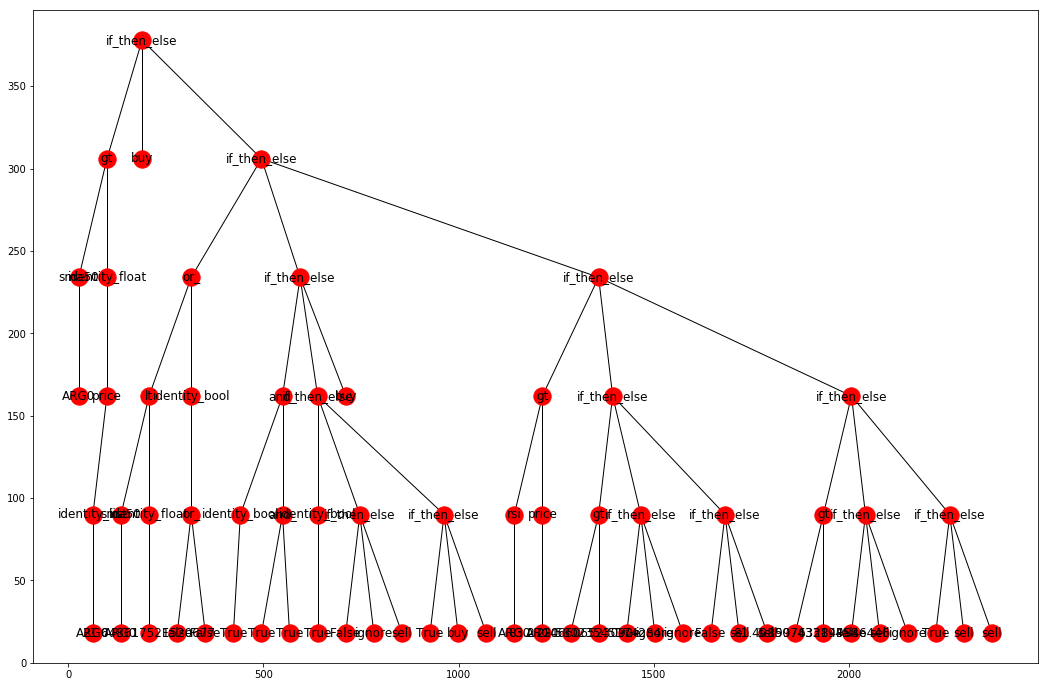

Backtesting report:
--

* Order execution log *

Start balance: cash = 1000 USDT, crypto = 0 
Start time: 2018-04-01 00:00:00
--
--
2018-04-09 12:00:00  	 OrderType.BUY    	 cash_balance ->      -1000.00 USDT 	 currency_balance ->      0.147079 BTC 	 (1 BTC = 6782.08841575 USDT ), slippage = 0.00
   signal: genetic_up strength=3 trend=1 horizon=None timestamp=2018-04-09 12:00:00 rsi_value=None
End time: 2018-06-01 00:00:00

Summary
--
Number of trades: 1
End cash: 0.00 USDT
End crypto: 0.147079 BTC
End price: 7450.0
Total value invested: 1000 USDT
Total value after investment: 1093.00 USDT (+9.30%)
Profit: 93.00 USDT

Additional stats:
  Max drawdown: -0.28943388250290814
  Max drawdown duration: 2044800.0
  Sharpe ratio: 0.20067988240169912
  Alpha: 0.00828353376175468
  Beta: 0.9763211753345945
  Buy-sell pair gains - overall stats
     min = nan, max = nan, mean = nan, stdev = nan
  Buy-sell pair losses - overall stats
     min = nan, max = nan, mean = nan, stdev = nan
  Buy-sell pa

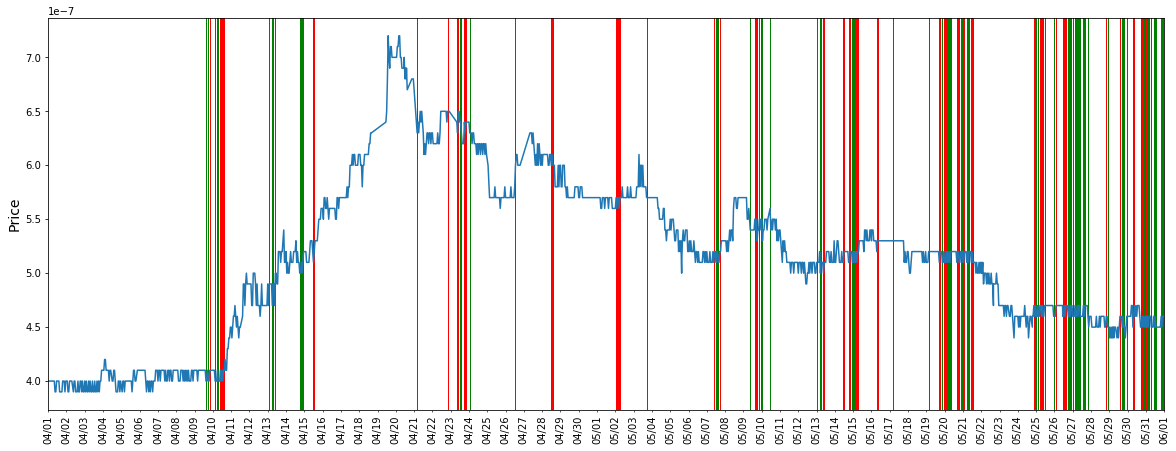

String representation:
if_then_else(gt(sma50(ARG0), identity_float(price(identity_list(ARG0)))), buy, if_then_else(or_(lt(sma50(ARG0), identity_float(21.648617521520677)), identity_bool(or_(False, False))), if_then_else(and_(identity_bool(True), and_(True, True)), if_then_else(identity_bool(True), if_then_else(False, ignore, sell), if_then_else(True, buy, sell)), buy), if_then_else(gt(rsi(ARG0), price(ARG0)), if_then_else(gt(83.27146606523092, 22.58023545174284), if_then_else(True, ignore, ignore), if_then_else(False, sell, sell)), if_then_else(gt(81.49150743319458, 1.8997632849846446), if_then_else(False, sell, ignore), if_then_else(True, sell, sell)))))



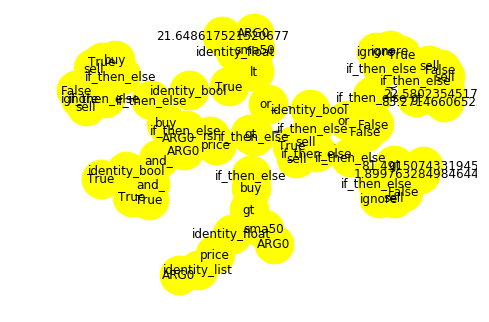

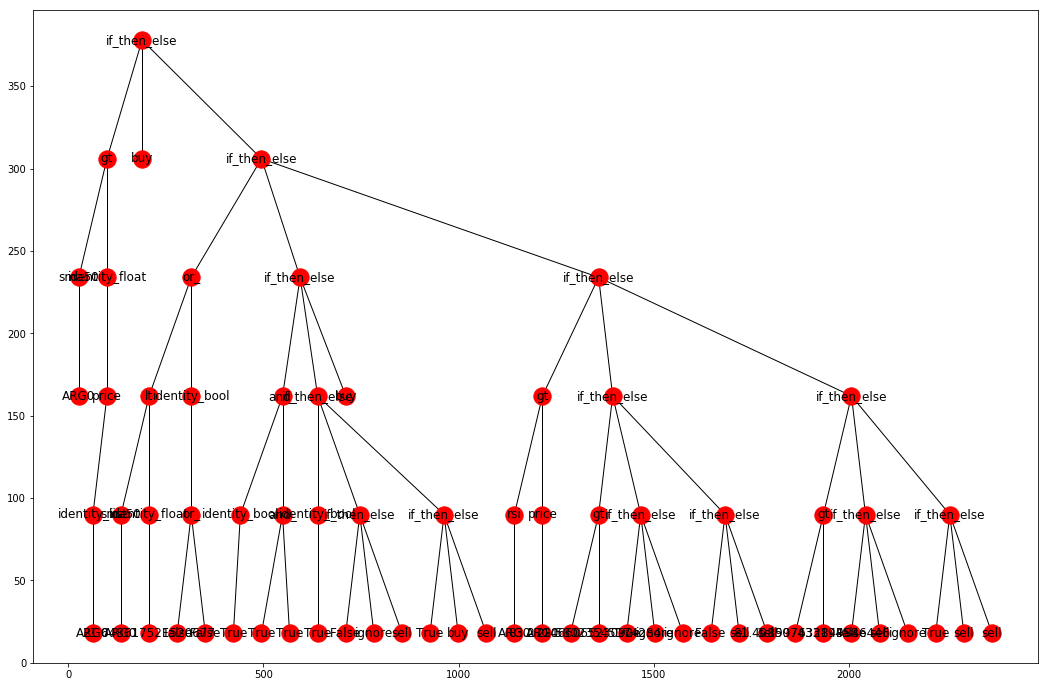

Backtesting report:
--

* Order execution log *

Start balance: cash = 1000 BTC, crypto = 0 
Start time: 2018-04-01 00:00:00
--
--
2018-04-09 15:00:00  	 OrderType.BUY    	 cash_balance ->      -1000.00 BTC 	 currency_balance -> 2493750000.000000 DOGE 	 (1 DOGE = 0.00000040 BTC ), slippage = 0.00
   signal: genetic_up strength=3 trend=1 horizon=None timestamp=2018-04-09 15:00:00 rsi_value=None
2018-04-09 17:00:00  	 OrderType.SELL   	 cash_balance ->       1019.88 BTC 	 currency_balance -> -2493750000.000000 DOGE 	 (1 DOGE = 0.00000041 BTC ), slippage = 0.00
   signal: genetic_down strength=3 trend=-1 horizon=None timestamp=2018-04-09 17:00:00 rsi_value=None
2018-04-09 18:00:00  	 OrderType.BUY    	 cash_balance ->      -1019.88 BTC 	 currency_balance -> 2543329256.835938 DOGE 	 (1 DOGE = 0.00000040 BTC ), slippage = 0.00
   signal: genetic_up strength=3 trend=1 horizon=None timestamp=2018-04-09 18:00:00 rsi_value=None
2018-04-09 20:00:00  	 OrderType.SELL   	 cash_balance ->       104

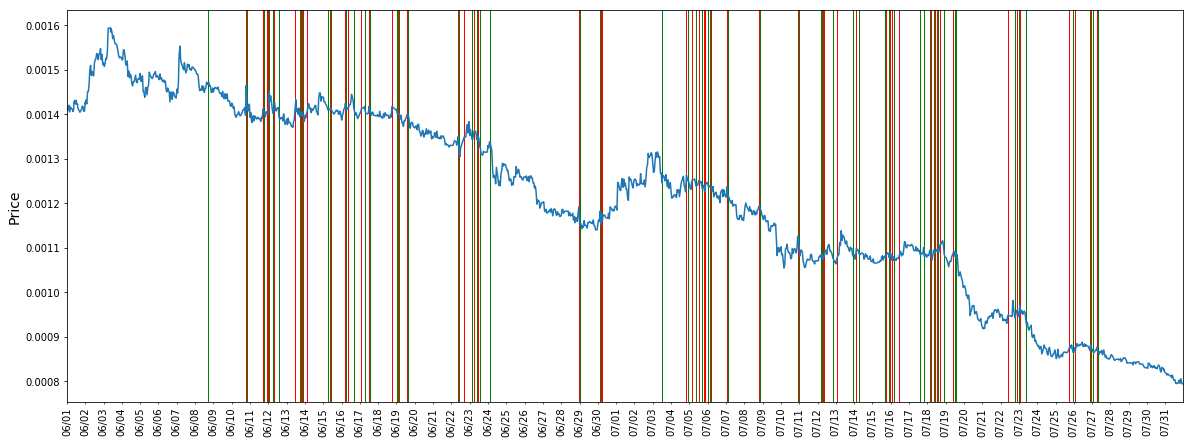

String representation:
if_then_else(gt(sma50(ARG0), identity_float(price(identity_list(ARG0)))), buy, if_then_else(or_(lt(sma50(ARG0), identity_float(21.648617521520677)), identity_bool(or_(False, False))), if_then_else(and_(identity_bool(True), and_(True, True)), if_then_else(identity_bool(True), if_then_else(False, ignore, sell), if_then_else(True, buy, sell)), buy), if_then_else(gt(rsi(ARG0), price(ARG0)), if_then_else(gt(83.27146606523092, 22.58023545174284), if_then_else(True, ignore, ignore), if_then_else(False, sell, sell)), if_then_else(gt(81.49150743319458, 1.8997632849846446), if_then_else(False, sell, ignore), if_then_else(True, sell, sell)))))



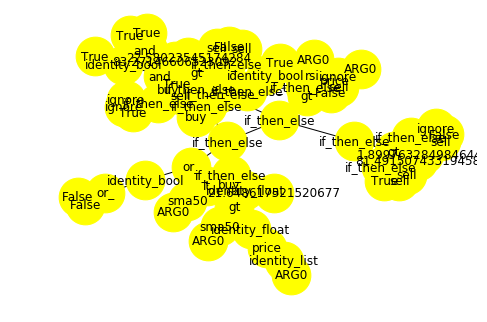

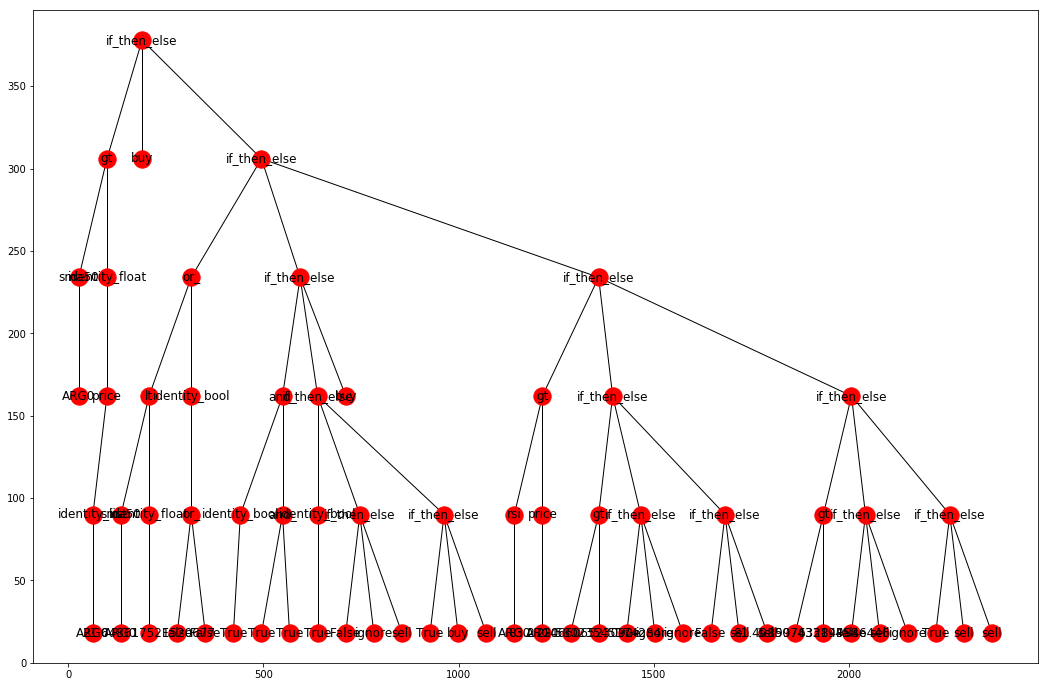

Backtesting report:
--

* Order execution log *

Start balance: cash = 1000 BTC, crypto = 0 
Start time: 2018-06-01 00:00:00
--
--
2018-06-08 17:04:00  	 OrderType.BUY    	 cash_balance ->      -1000.00 BTC 	 currency_balance -> 678216.172481 OMG 	 (1 OMG = 0.00147077 BTC ), slippage = 0.00
   signal: genetic_up strength=3 trend=1 horizon=None timestamp=2018-06-08 17:04:00 rsi_value=None
2018-06-10 19:04:00  	 OrderType.SELL   	 cash_balance ->        991.19 BTC 	 currency_balance -> -678216.172481 OMG 	 (1 OMG = 0.00146513 BTC ), slippage = 0.00
   signal: genetic_down strength=3 trend=-1 horizon=None timestamp=2018-06-10 19:04:00 rsi_value=None
2018-06-10 20:08:00  	 OrderType.BUY    	 cash_balance ->       -991.19 BTC 	 currency_balance -> 701538.082769 OMG 	 (1 OMG = 0.00140935 BTC ), slippage = 0.00
   signal: genetic_up strength=3 trend=1 horizon=None timestamp=2018-06-10 20:08:00 rsi_value=None
2018-06-11 17:05:00  	 OrderType.SELL   	 cash_balance ->        988.00 BTC 	 currenc

In [8]:
best_overall = best_individuals_across_variants_and_datasets.iloc[0]
evaluations = best_overall.evaluations
for evaluation in evaluations:
    e._print_individual_info(best_overall.individual, evaluation)

### Let's see its performance on the validation set...

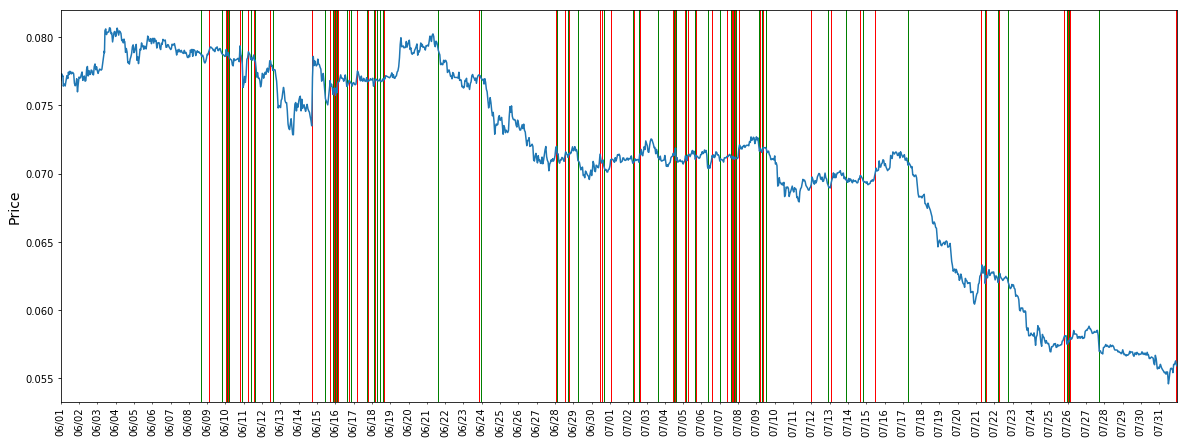

String representation:
if_then_else(gt(sma50(ARG0), identity_float(price(identity_list(ARG0)))), buy, if_then_else(or_(lt(sma50(ARG0), identity_float(21.648617521520677)), identity_bool(or_(False, False))), if_then_else(and_(identity_bool(True), and_(True, True)), if_then_else(identity_bool(True), if_then_else(False, ignore, sell), if_then_else(True, buy, sell)), buy), if_then_else(gt(rsi(ARG0), price(ARG0)), if_then_else(gt(83.27146606523092, 22.58023545174284), if_then_else(True, ignore, ignore), if_then_else(False, sell, sell)), if_then_else(gt(81.49150743319458, 1.8997632849846446), if_then_else(False, sell, ignore), if_then_else(True, sell, sell)))))



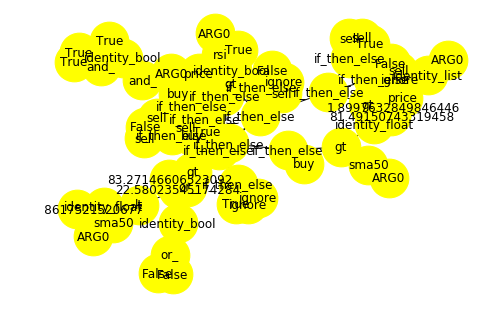

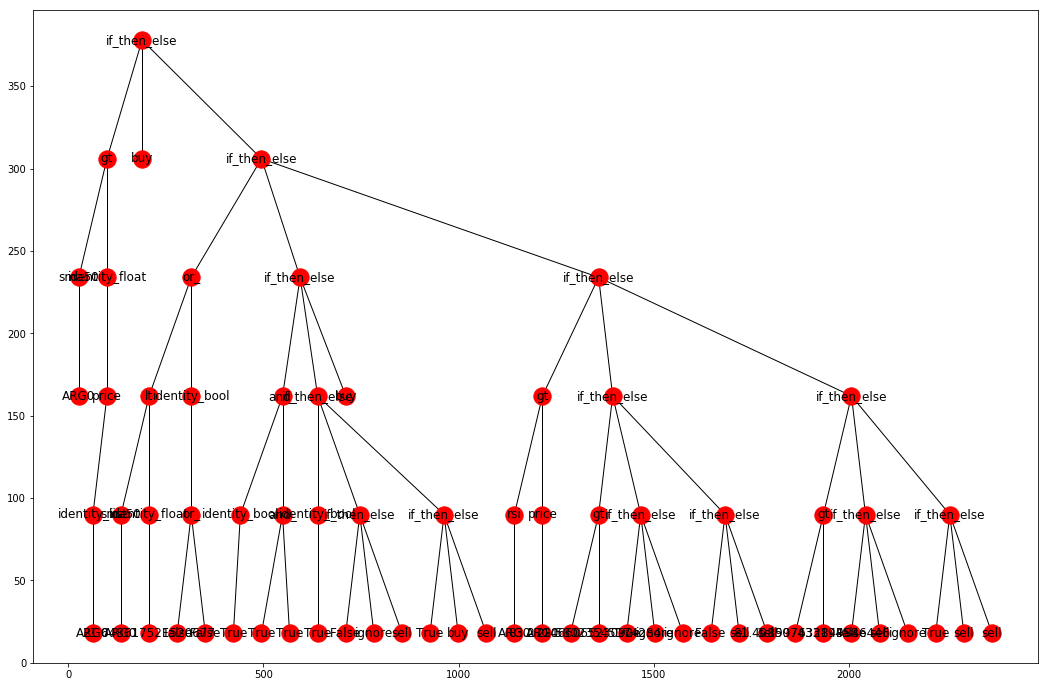

Backtesting report:
--

* Order execution log *

Start balance: cash = 1000 BTC, crypto = 0 
Start time: 2018-06-01 00:00:00
--
--
2018-06-08 16:03:00  	 OrderType.BUY    	 cash_balance ->      -1000.00 BTC 	 currency_balance ->  12669.929475 ETH 	 (1 ETH = 0.07872972 BTC ), slippage = 0.00
   signal: genetic_up strength=3 trend=1 horizon=None timestamp=2018-06-08 16:03:00 rsi_value=None
2018-06-09 02:04:00  	 OrderType.SELL   	 cash_balance ->        997.73 BTC 	 currency_balance -> -12669.929475 ETH 	 (1 ETH = 0.07894528 BTC ), slippage = 0.00
   signal: genetic_down strength=3 trend=-1 horizon=None timestamp=2018-06-09 02:04:00 rsi_value=None
2018-06-09 19:01:00  	 OrderType.BUY    	 cash_balance ->       -997.73 BTC 	 currency_balance ->  12624.246065 ETH 	 (1 ETH = 0.07883530 BTC ), slippage = 0.00
   signal: genetic_up strength=3 trend=1 horizon=None timestamp=2018-06-09 19:01:00 rsi_value=None
2018-06-10 01:04:00  	 OrderType.SELL   	 cash_balance ->        996.20 BTC 	 currency

In [9]:
evaluation = e._build_evaluation_object(best_overall.individual, best_overall.variant, e.validation_data[0])
e._print_individual_info(best_overall.individual, evaluation)

In [10]:
perf = e.evaluate_individual_on_data_collection(best_overall.individual, best_overall.variant, e.training_data)
perf

,alpha,benchmark_profit_percent,benchmark_profit_percent_usdt,beta,buy_currency,cash,counter_currency,crypto,current_price,current_timestamp,end_cash,end_crypto,end_crypto_currency,end_price,end_time,end_value,end_value_usdt,evaluate_profit_on_last_order,evaluation,experiment_id,hof_ranking,individual,individual_str,max_buy_sell_pair_gain,max_buy_sell_pair_loss,max_buy_sell_pair_return,max_drawdown,max_drawdown_duration,mean_buy_sell_pair_gain,mean_buy_sell_pair_loss,mean_buy_sell_pair_return,min_buy_sell_pair_gain,min_buy_sell_pair_loss,min_buy_sell_pair_return,num_buy_sell_pairs,num_buys,num_gains,num_losses,num_orders,num_profitable_trades,num_sells,num_trades,num_unprofitable_trades,percent_profitable_trades,profit,profit_percent,profit_percent_usdt,profit_usdt,resample_period,sharpe_ratio,slippage,source,start_cash,start_crypto,start_time,start_value,start_value_usdt,std_buy_sell_pair_gain,std_buy_sell_pair_loss,std_buy_sell_pair_return,time_delay,transaction_cost_percent,transaction_currency,verbose
0,0.008284,4.700516,4.700516,0.976321,BTC,0.000000,USDT,0.147079,7.450000e+03,1.527811e+09,0.000000,0.147079,BTC,7.450000e+03,1.527811e+09,1092.996155,1.100883e+03,1.0,<backtester_ticks.TickDrivenBacktester object ...,run_evolution.data_BTC-USDT-1522540800.0-15278...,None,"[<deap.gp.Primitive object at 0x12fb34ef8>, <d...","if_then_else(gt(sma50(ARG0), identity_float(pr...",NaN,NaN,NaN,-0.289434,2044800.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,NaN,92.996155,9.299616,10.088324,1.008832e+02,60.0,0.200680,0.0,0.0,1000.0,0.0,1.522541e+09,1000.0,1000.0,NaN,NaN,NaN,0.0,0.0025,BTC,0.0
1,0.152298,11.634848,24.286563,0.482730,DOGE,2496.240434,BTC,0.000000,4.600000e-07,1.527811e+09,2496.240434,0.000000,DOGE,4.600000e-07,1.527811e+09,2496.240434,1.868436e+07,1.0,<backtester_ticks.TickDrivenBacktester object ...,run_evolution.data_BTC-USDT-1522540800.0-15278...,None,"[<deap.gp.Primitive object at 0x12fb34ef8>, <d...","if_then_else(gt(sma50(ARG0), identity_float(pr...",0.06117,-0.00250,0.06117,-0.186751,1018800.0,0.020146,-0.048874,0.013650,0.013086,-0.091563,-0.091563,85.0,85.0,77.0,8.0,170.0,77.0,85.0,170.0,8.0,0.905882,1496.240434,149.624043,170.005197,1.176436e+07,60.0,1.071078,0.0,0.0,1000.0,0.0,1.522541e+09,1000.0,6920000.0,0.007640,0.034646,0.023917,0.0,0.0025,DOGE,0.0
2,-0.003982,-46.286291,-45.869559,0.619277,OMG,0.000000,BTC,839835.511708,7.939700e-04,1.533078e+09,0.000000,839835.511708,OMG,7.939700e-04,1.533082e+09,665.137191,5.125095e+06,1.0,<backtester_ticks.TickDrivenBacktester object ...,run_evolution.data_BTC-USDT-1522540800.0-15278...,None,"[<deap.gp.Primitive object at 0x12fb34ef8>, <d...","if_then_else(gt(sma50(ARG0), identity_float(pr...",0.02374,-0.00012,0.02374,-0.333523,5262360.0,0.008103,-0.024400,-0.002544,0.000062,-0.122847,-0.122847,58.0,59.0,39.0,19.0,117.0,39.0,58.0,117.0,19.0,0.672414,-334.862809,-33.486281,-31.528452,-2.359905e+06,60.0,-0.682619,0.0,0.0,1000.0,0.0,1.527811e+09,1000.0,7485000.0,0.005719,0.037098,0.026562,0.0,0.0025,OMG,0.0


In [11]:
doge = DogeDNACanvas(best_overall.individual,"container")
HTML(doge.create_container())

In [12]:
Javascript(doge.show())

<IPython.core.display.Javascript object>